# Viola - Jones Image Classifier

### Import Statements

In [5]:
import numpy as np
import cv2
import os
from adaBoost_helper import *

### Load the Train and Test Image Data
imageSet.train [(img1, label), (img2, label), ... , (imgN, label)]
imageSet.test  [(img1, label), (img2, label), ... , (imgN, label)]

In [6]:
car_dir = "/Users/wang3450/Desktop/ECE661/HW10/CarDetection"
images = ImageLoader(dir=car_dir)
images.load_train()
images.load_test()

### Monolithic AdaBoost

In [7]:
# boost = AdaBoost(T=10)
# boost.train(images.train, images.train_pos, images.train_neg)
#
# preds = list()
# actual = list()
# for img, label in images.test:
#     preds.append(boost.classify(img))
#     actual.append(label)
#
# preds = np.array(preds)
# actual = np.array(actual)
#
# TP = (np.sum((preds == 1) & (actual == 1))) / images.test_pos
# FP = (np.sum((preds == 1) & (actual == 0))) / images.test_neg
# FN = (np.sum((preds == 0) & (actual == 1))) / images.test_pos
# TN = (np.sum((preds == 0) & (actual == 0))) / images.test_neg
#
# assert(FN + TP == 1)
# assert(FP + TN == 1)
#
# print(f'True Positive: {TP}')
# print(f'False Negative: {FN}')
# print(f'False Positive: {FP}')
# print(f'True Negative: {TN}')

### Cascased AdaBoost

In [8]:
all_TP_rates = list()
all_FN_rates = list()
all_FP_rates = list()
all_TN_rates = list()

layers = [
    [1],
    [1, 2],
    [1, 2, 4],
    [1, 2, 4, 8]
]

for index, layer in tqdm(enumerate(layers)):
    boost = CascadeBoost(layer)
    boost.train(images.train)


    preds = list()
    actual = list()
    for img, label in images.test:
        preds.append(boost.classify(img))
        actual.append(label)

    preds = np.array(preds)
    actual = np.array(actual)

    TP = (np.sum((preds == 1) & (actual == 1))) / images.test_pos
    FP = (np.sum((preds == 1) & (actual == 0))) / images.test_neg
    FN = (np.sum((preds == 0) & (actual == 1))) / images.test_pos
    TN = (np.sum((preds == 0) & (actual == 0))) / images.test_neg

    all_TP_rates.append(TP)
    all_FN_rates.append(FN)
    all_FP_rates.append(FP)
    all_TN_rates.append(TN)
    print(f'Completed Cascade Stage: {index}')

1it [02:22, 142.89s/it]

Completed Cascade Stage: 0


2it [05:43, 176.92s/it]

Completed Cascade Stage: 1


3it [10:39, 231.24s/it]

Completed Cascade Stage: 2


4it [17:59, 269.80s/it]

Completed Cascade Stage: 3


Text(0, 0.5, 'False Positive Rate')

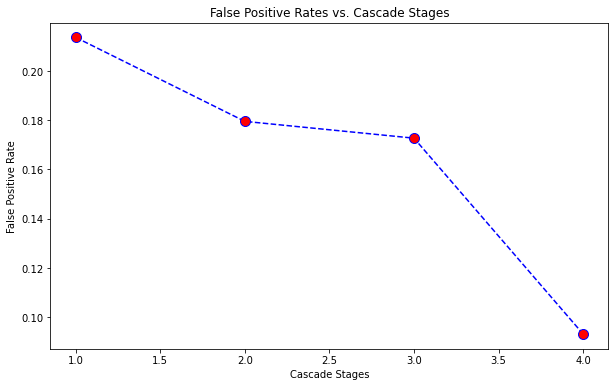

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10, 6))
plt.plot(range(1, 5), all_FP_rates, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('False Positive Rates vs. Cascade Stages')
plt.xlabel('Cascade Stages')
plt.ylabel('False Positive Rate')

Text(0, 0.5, 'False Negative Rate')

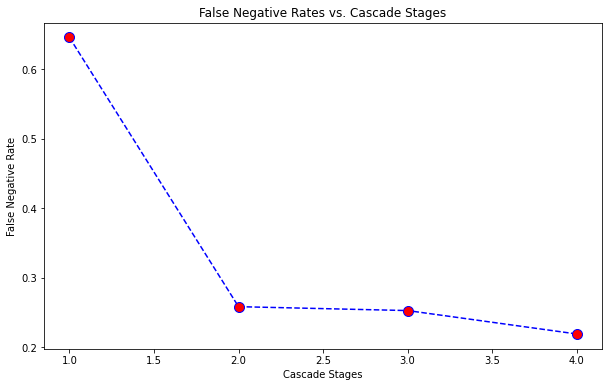

In [16]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 5), all_TP_rates, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('False Negative Rates vs. Cascade Stages')
plt.xlabel('Cascade Stages')
plt.ylabel('False Negative Rate')

Text(0, 0.5, 'True Positive Rate')

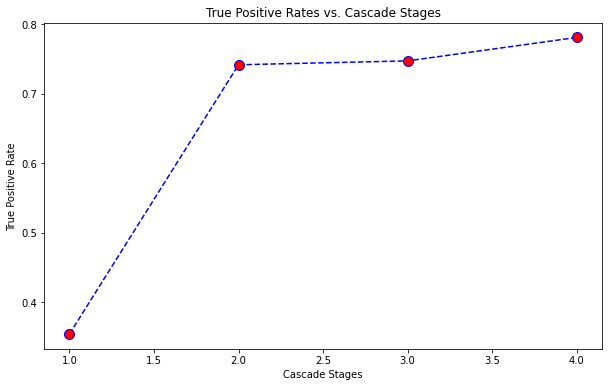

In [17]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 5), all_FN_rates, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('True Positive Rates vs. Cascade Stages')
plt.xlabel('Cascade Stages')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'True Negative Rate')

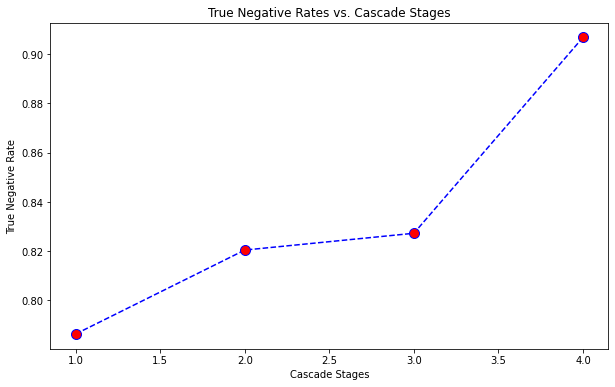

In [15]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 5), all_TN_rates, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('True Negative Rates vs. Cascade Stages')
plt.xlabel('Cascade Stages')
plt.ylabel('True Negative Rate')